
-  **개별 스프링의 강성행렬 구하기**:
-  각 스프링의 강성행렬은 $k_i$ 로 표현되며, 이때 $k_i$ 는 각 스프링의 강성값을 나타냅니다.
-  이미지에서 $k_1 ,k_2 ,k_3$ ​에 대한 강성행렬이 각각 계산되어 있습니다.
-  각 행렬은 다음과 같습니다:

 $[k_1 ]=$ $\left\lbrack \begin{array}{cc} 1000 & -1000\newline -1000 & 1000 \end{array}\right\rbrack$ , $[k_2 ]=$ $\left\lbrack \begin{array}{cc} 2000 & -2000\newline -2000 & 2000 \end{array}\right\rbrack$ , $[k_3 ]=$ $\left\lbrack \begin{array}{cc} 3000 & -3000\newline -3000 & 3000 \end{array}\right\rbrack$

-  **전체 시스템의 강성행렬**:
-  각 요소의 강성행렬을 시스템에 맞게 배치하여 전체 시스템의 강성행렬 $[K]$ 을 구성합니다.
-  강성행렬 $[K]$ 은 이미지에서처럼 여러 개의 요소 강성행렬을 조합하여 구성됩니다.
-  $[K]$ 의 최종 형태는 다음과 같습니다:

 [K]= $\left\lbrack \begin{array}{cccc} 1000 & -1000 & 0 & 0\newline -1000 & 3000 & -2000 & 0\newline 0 & -2000 & 5000 & -3000\newline 0 & 0 & -3000 & 3000 \end{array}\right\rbrack$ ​​

-  **전체 시스템의 방정식**:
-  전체 강성행렬과 변위, 외력을 포함하는 방정식은 다음과 같이 표현됩니다:

$$\lbrace F\rbrace =[K]\lbrace d\rbrace$$

-  여기서 $\lbrace F\rbrace$ 는 외력 벡터, $\[K\]$ 는 시스템의 강성행렬, $\lbrace d\rbrace$ 는 변위 벡터입니다.
-  이 방정식을 풀면 각 절점에서의 변위를 구할 수 있습니다.

In [1]:
% 유한요소법을 이용한 스프링 시스템 해석

% 스프링 상수
k1 = 1000;  % lb/in
k2 = 2000;  % lb/in
k3 = 3000;  % lb/in

% 각 스프링의 강성행렬 정의
K1 = [k1 -k1; -k1 k1];
K2 = [k2 -k2; -k2 k2];
K3 = [k3 -k3; -k3 k3];

% 전체 강성행렬 조립
K = zeros(4); % 총 4개의 노드(자유도) 있으므로 4x4 행렬
K(1:2, 1:2) = K(1:2, 1:2) + K1;
K(2:3, 2:3) = K(2:3, 2:3) + K2;
K(3:4, 3:4) = K(3:4, 3:4) + K3;

% 경계 조건 및 외력 정의
F = zeros(4, 1);
F(3) = 5000; % 5000 lb의 외력
F(4) = 5000; % 5000 lb의 외력

% 고정점 경계 조건 적용 (u1 = 0, u2 = 0)
K_reduced = K(3:4, 3:4);
F_reduced = F(3:4);

% 선형 방정식 풀기 (변위 계산)
u_reduced = K_reduced \ F_reduced;

% 전체 변위 백터
u = [0; 0; u_reduced];

% 각 스프링에 걸리는 힘 계산
F_spring1 = K1 * [u(1); u(2)];
F_spring2 = K2 * [u(2); u(3)];
F_spring3 = K3 * [u(3); u(4)];

% 결과 출력
fprintf('Node 3 Displacement: %.4f in\n', u(3));

Node 3 Displacement: 5.0000 in

In [2]:
fprintf('Node 4 Displacement: %.4f in\n', u(4));

Node 4 Displacement: 6.6667 in

In [3]:
fprintf('Spring 1 Force: %.4f lb\n', F_spring1(1));

Spring 1 Force: 0.0000 lb

In [4]:
fprintf('Spring 2 Force: %.4f lb\n', F_spring2(1));

Spring 2 Force: -10000.0000 lb

In [5]:
fprintf('Spring 3 Force: %.4f lb\n', F_spring3(1));

Spring 3 Force: -5000.0000 lb


**1. 노드 변위**



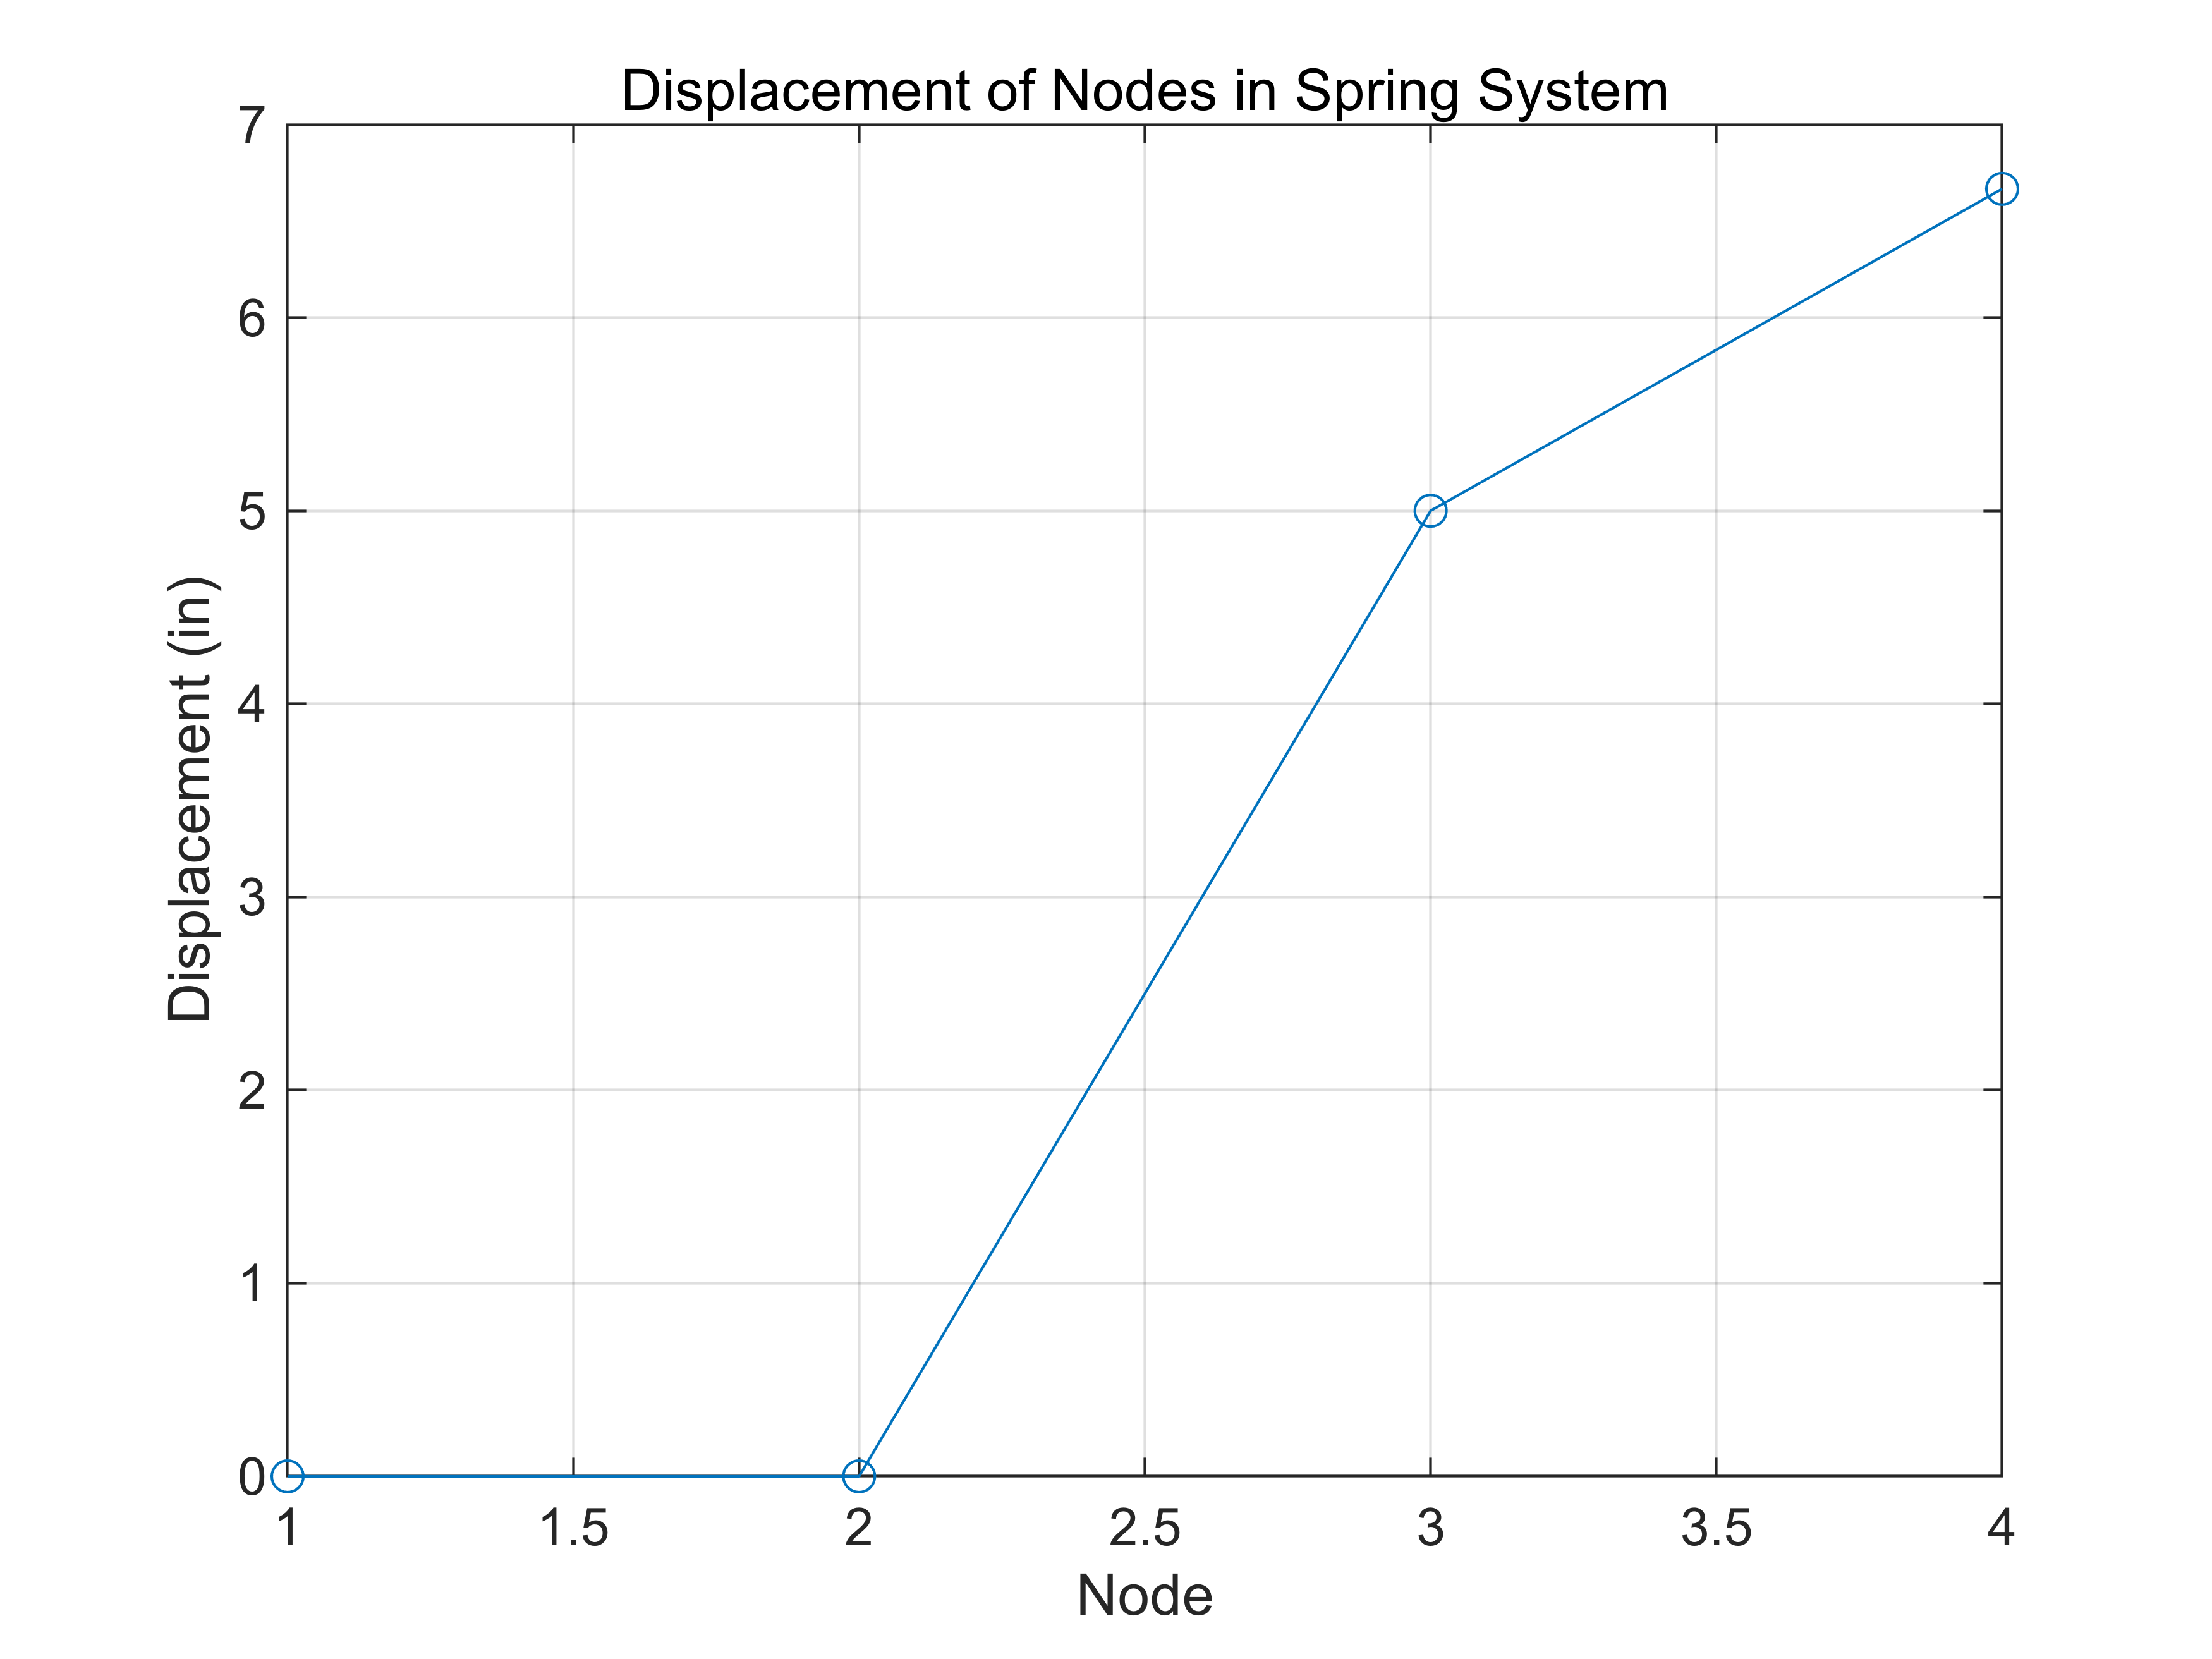

In [6]:
% 노드의 변위 시각화
figure;
nodes = 1:4;
displacements = [0, 0, 5, 6.6667]; % 노드 1과 2는 고정되어 있으므로 변위가 0
plot(nodes, displacements, '-o');
xlabel('Node');
ylabel('Displacement (in)');
title('Displacement of Nodes in Spring System');
grid on;


**2. 스프링에 걸리는 힘 시각화**



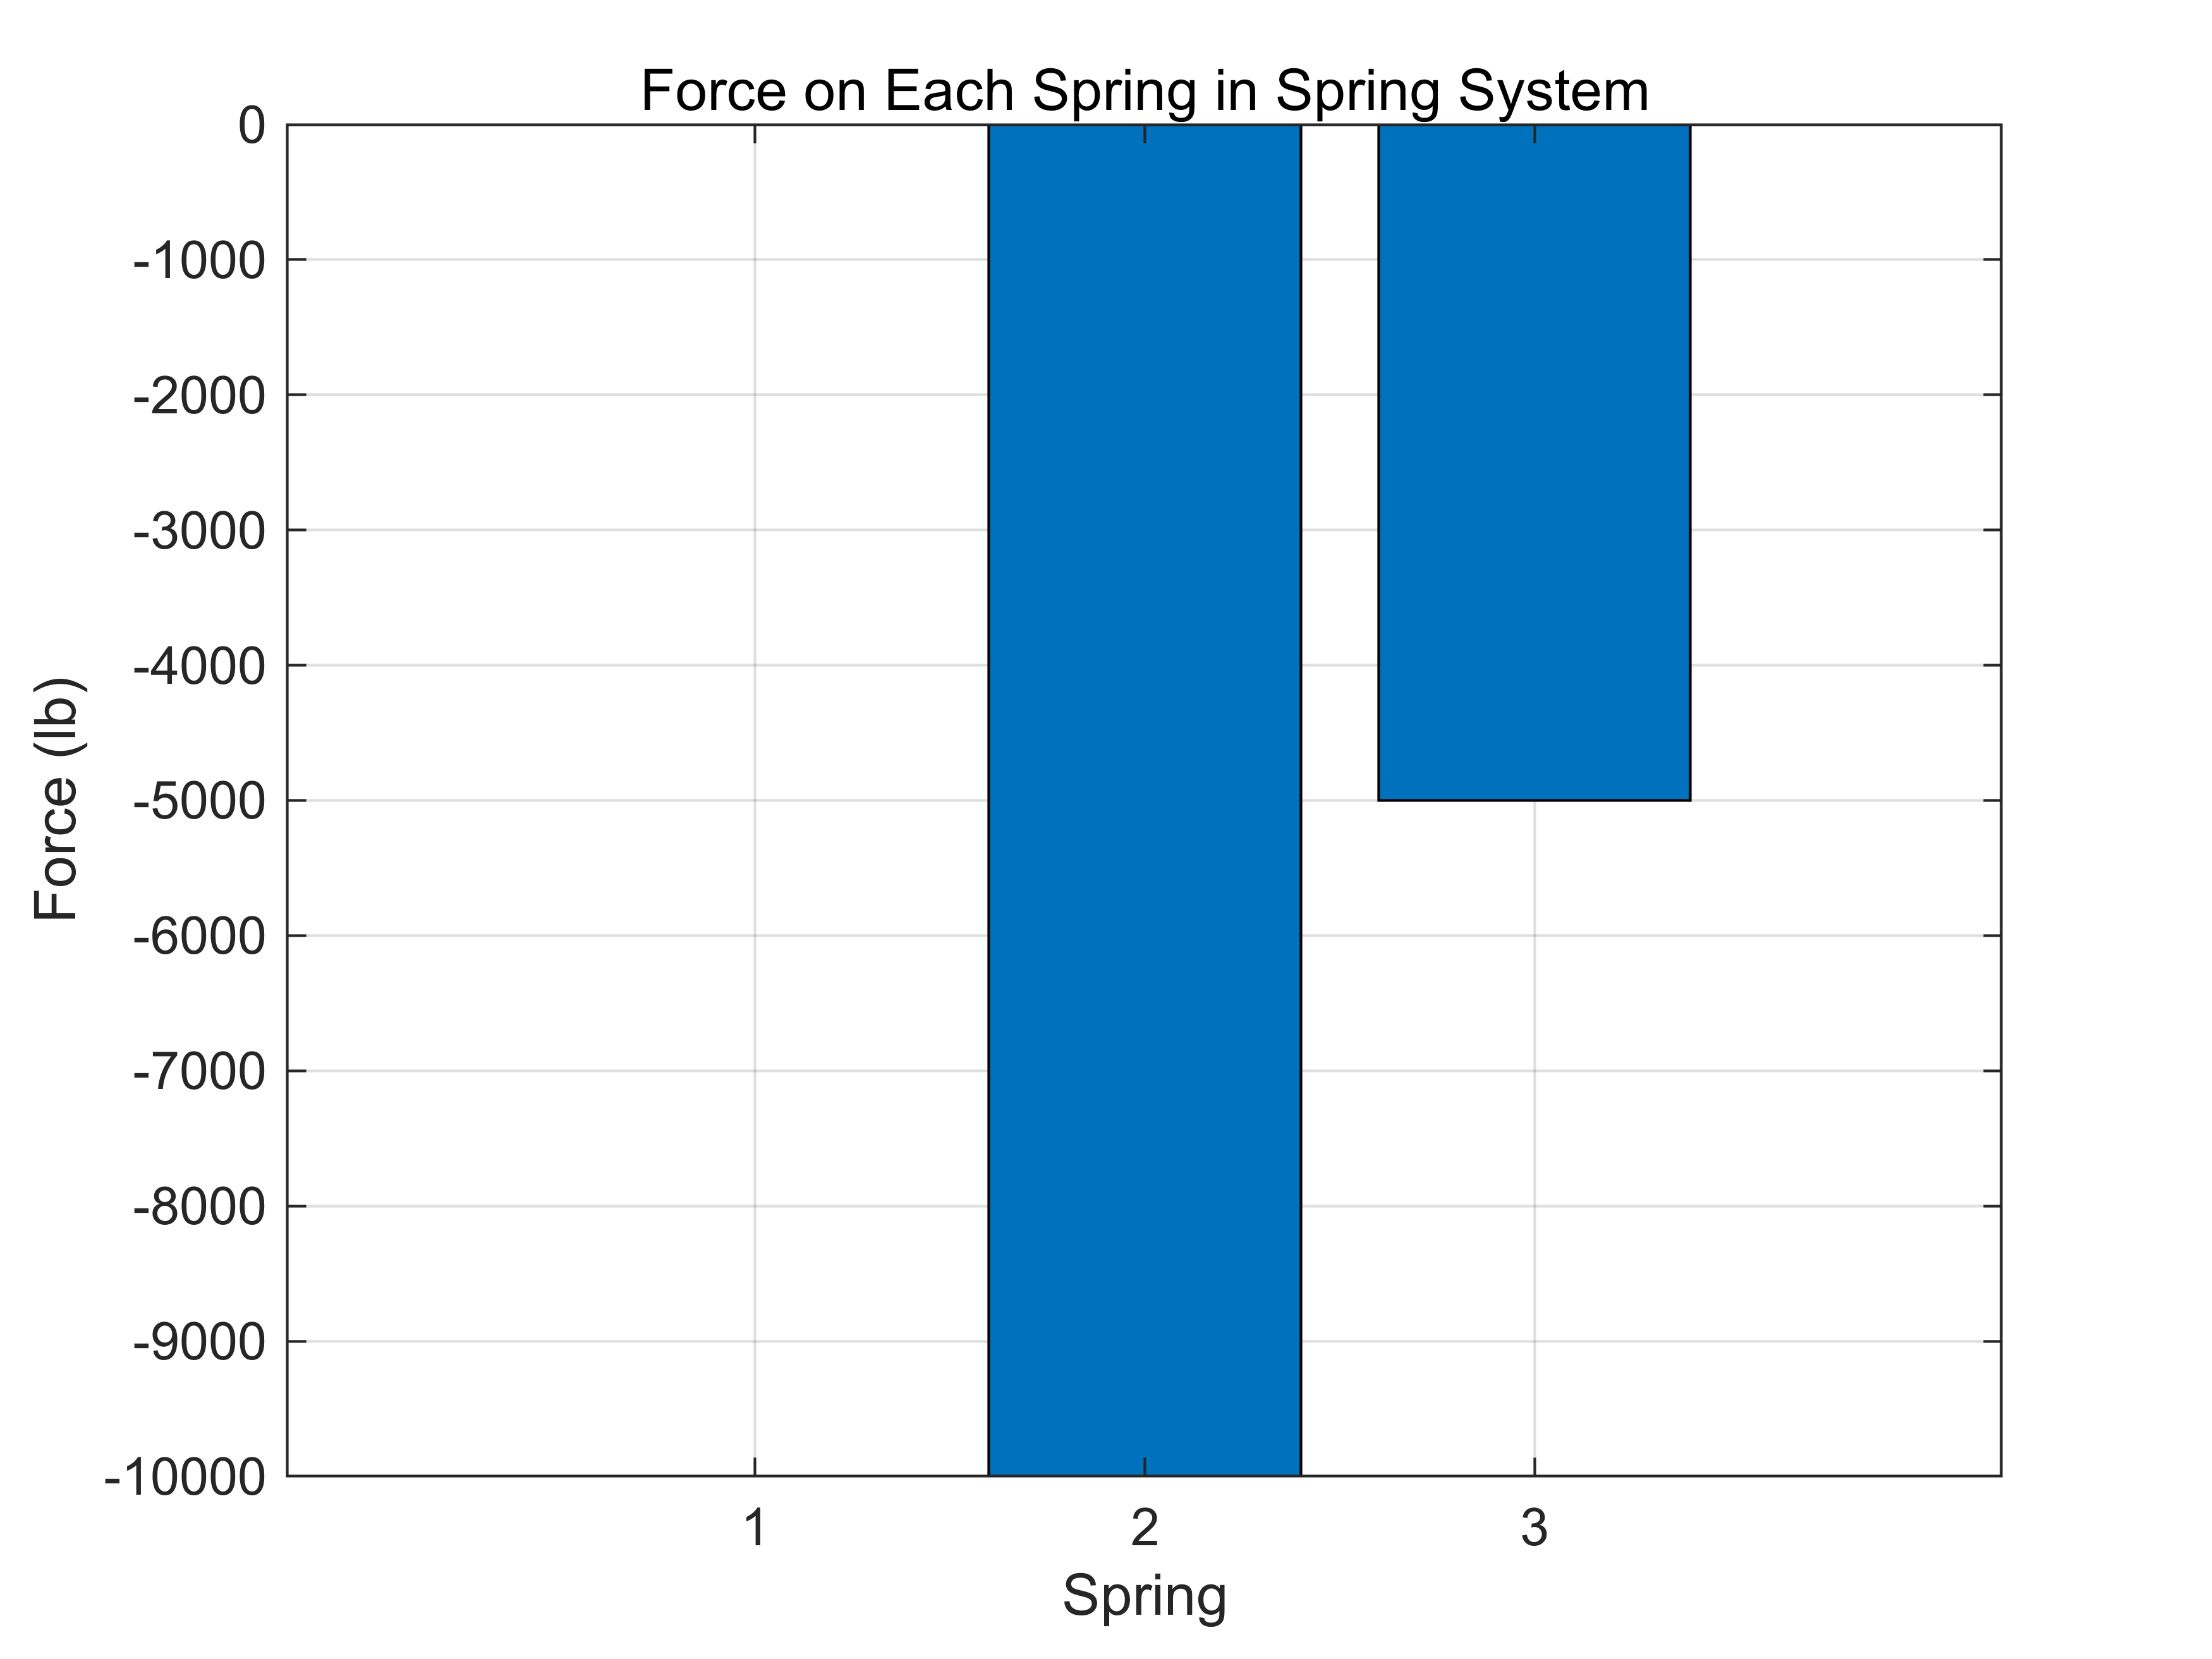

In [7]:
% 스프링에 걸리는 힘 시각화
figure;
springs = 1:3;
forces = [0, -10000, -5000]; % 스프링 1, 2, 3의 힘
bar(springs, forces);
xlabel('Spring');
ylabel('Force (lb)');
title('Force on Each Spring in Spring System');
grid on;


**3. 스프링 시스템 전체 구조**



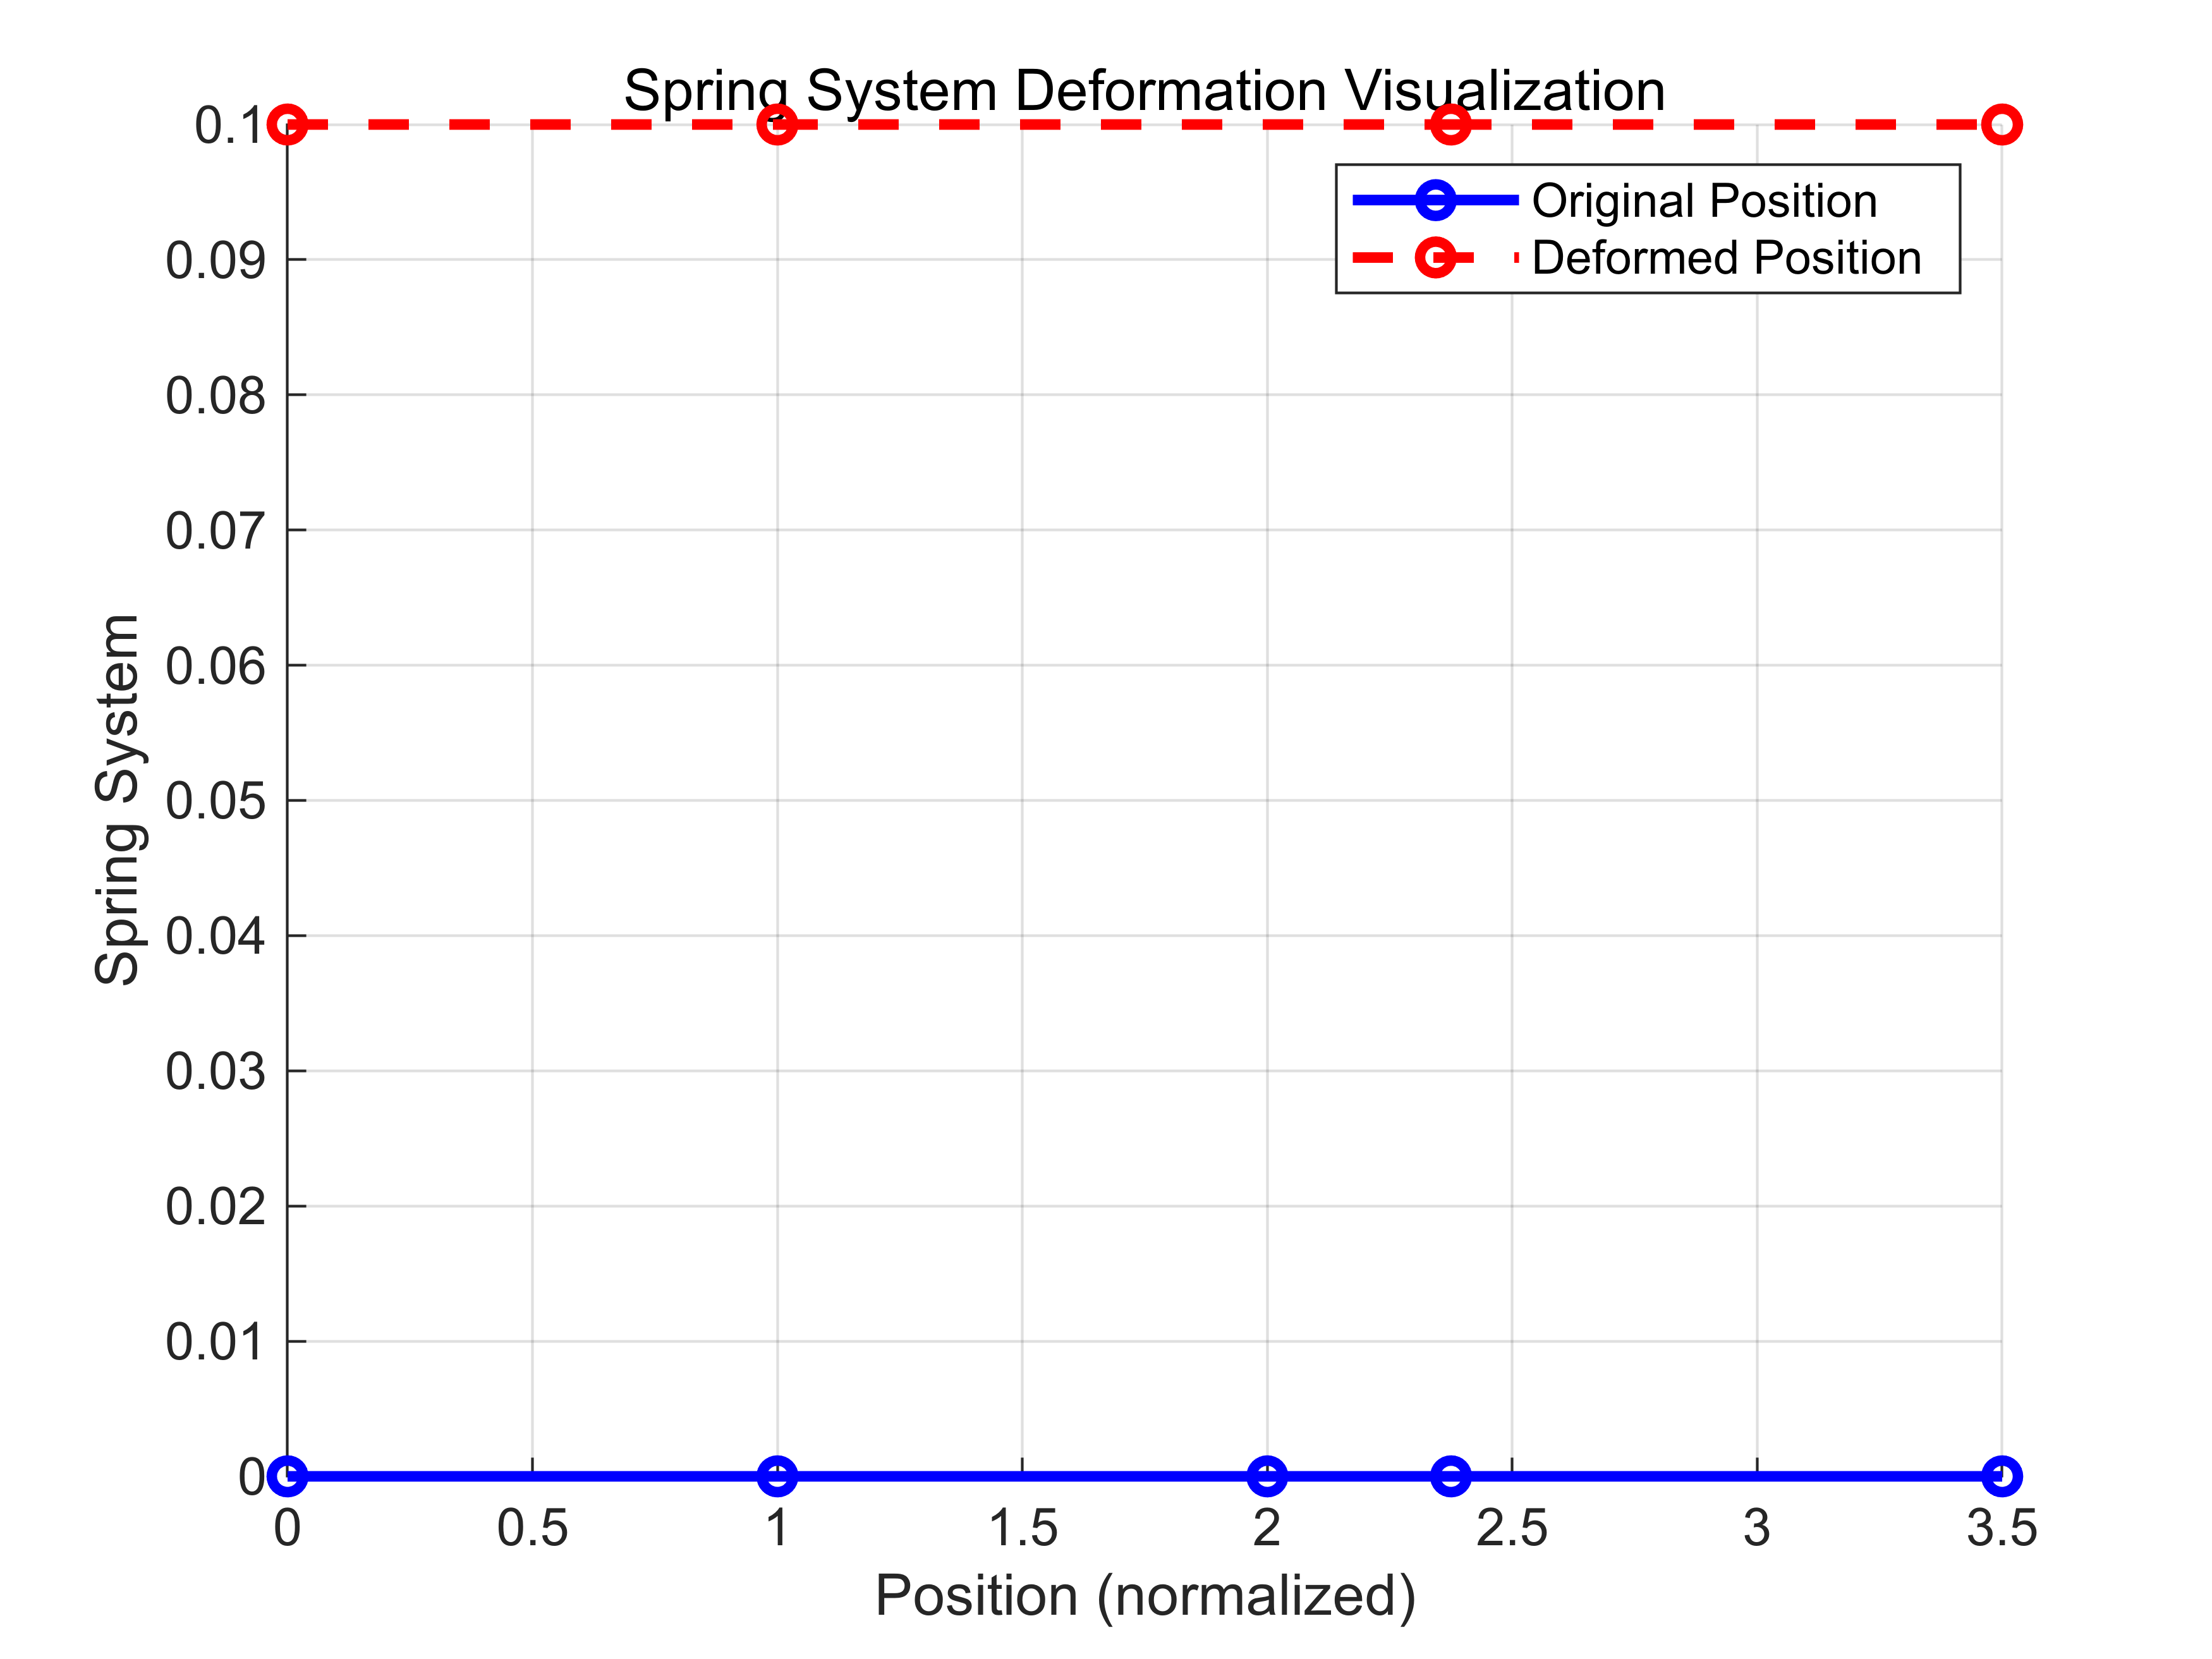

In [8]:
% 스프링 시스템의 변형 시각화
figure;
hold on;
% 노드 위치
node_positions = [0, 1, 2, 3];
displacements_scaled = displacements / max(displacements) * 0.5; % 변위 시각화를 위한 스케일링
new_positions = node_positions + displacements_scaled;

% 스프링과 노드 시각화
for i = 1:length(node_positions) - 1
    plot([node_positions(i) new_positions(i+1)], [0 0], 'b-o', 'LineWidth', 2); % 원래 위치
    plot([new_positions(i) new_positions(i+1)], [0.1 0.1], 'r--o', 'LineWidth', 2); % 변형된 위치
end
xlabel('Position (normalized)');
ylabel('Spring System');
title('Spring System Deformation Visualization');
legend('Original Position', 'Deformed Position');
grid on;
hold off;


**4. 스프링 시스템의 변형**



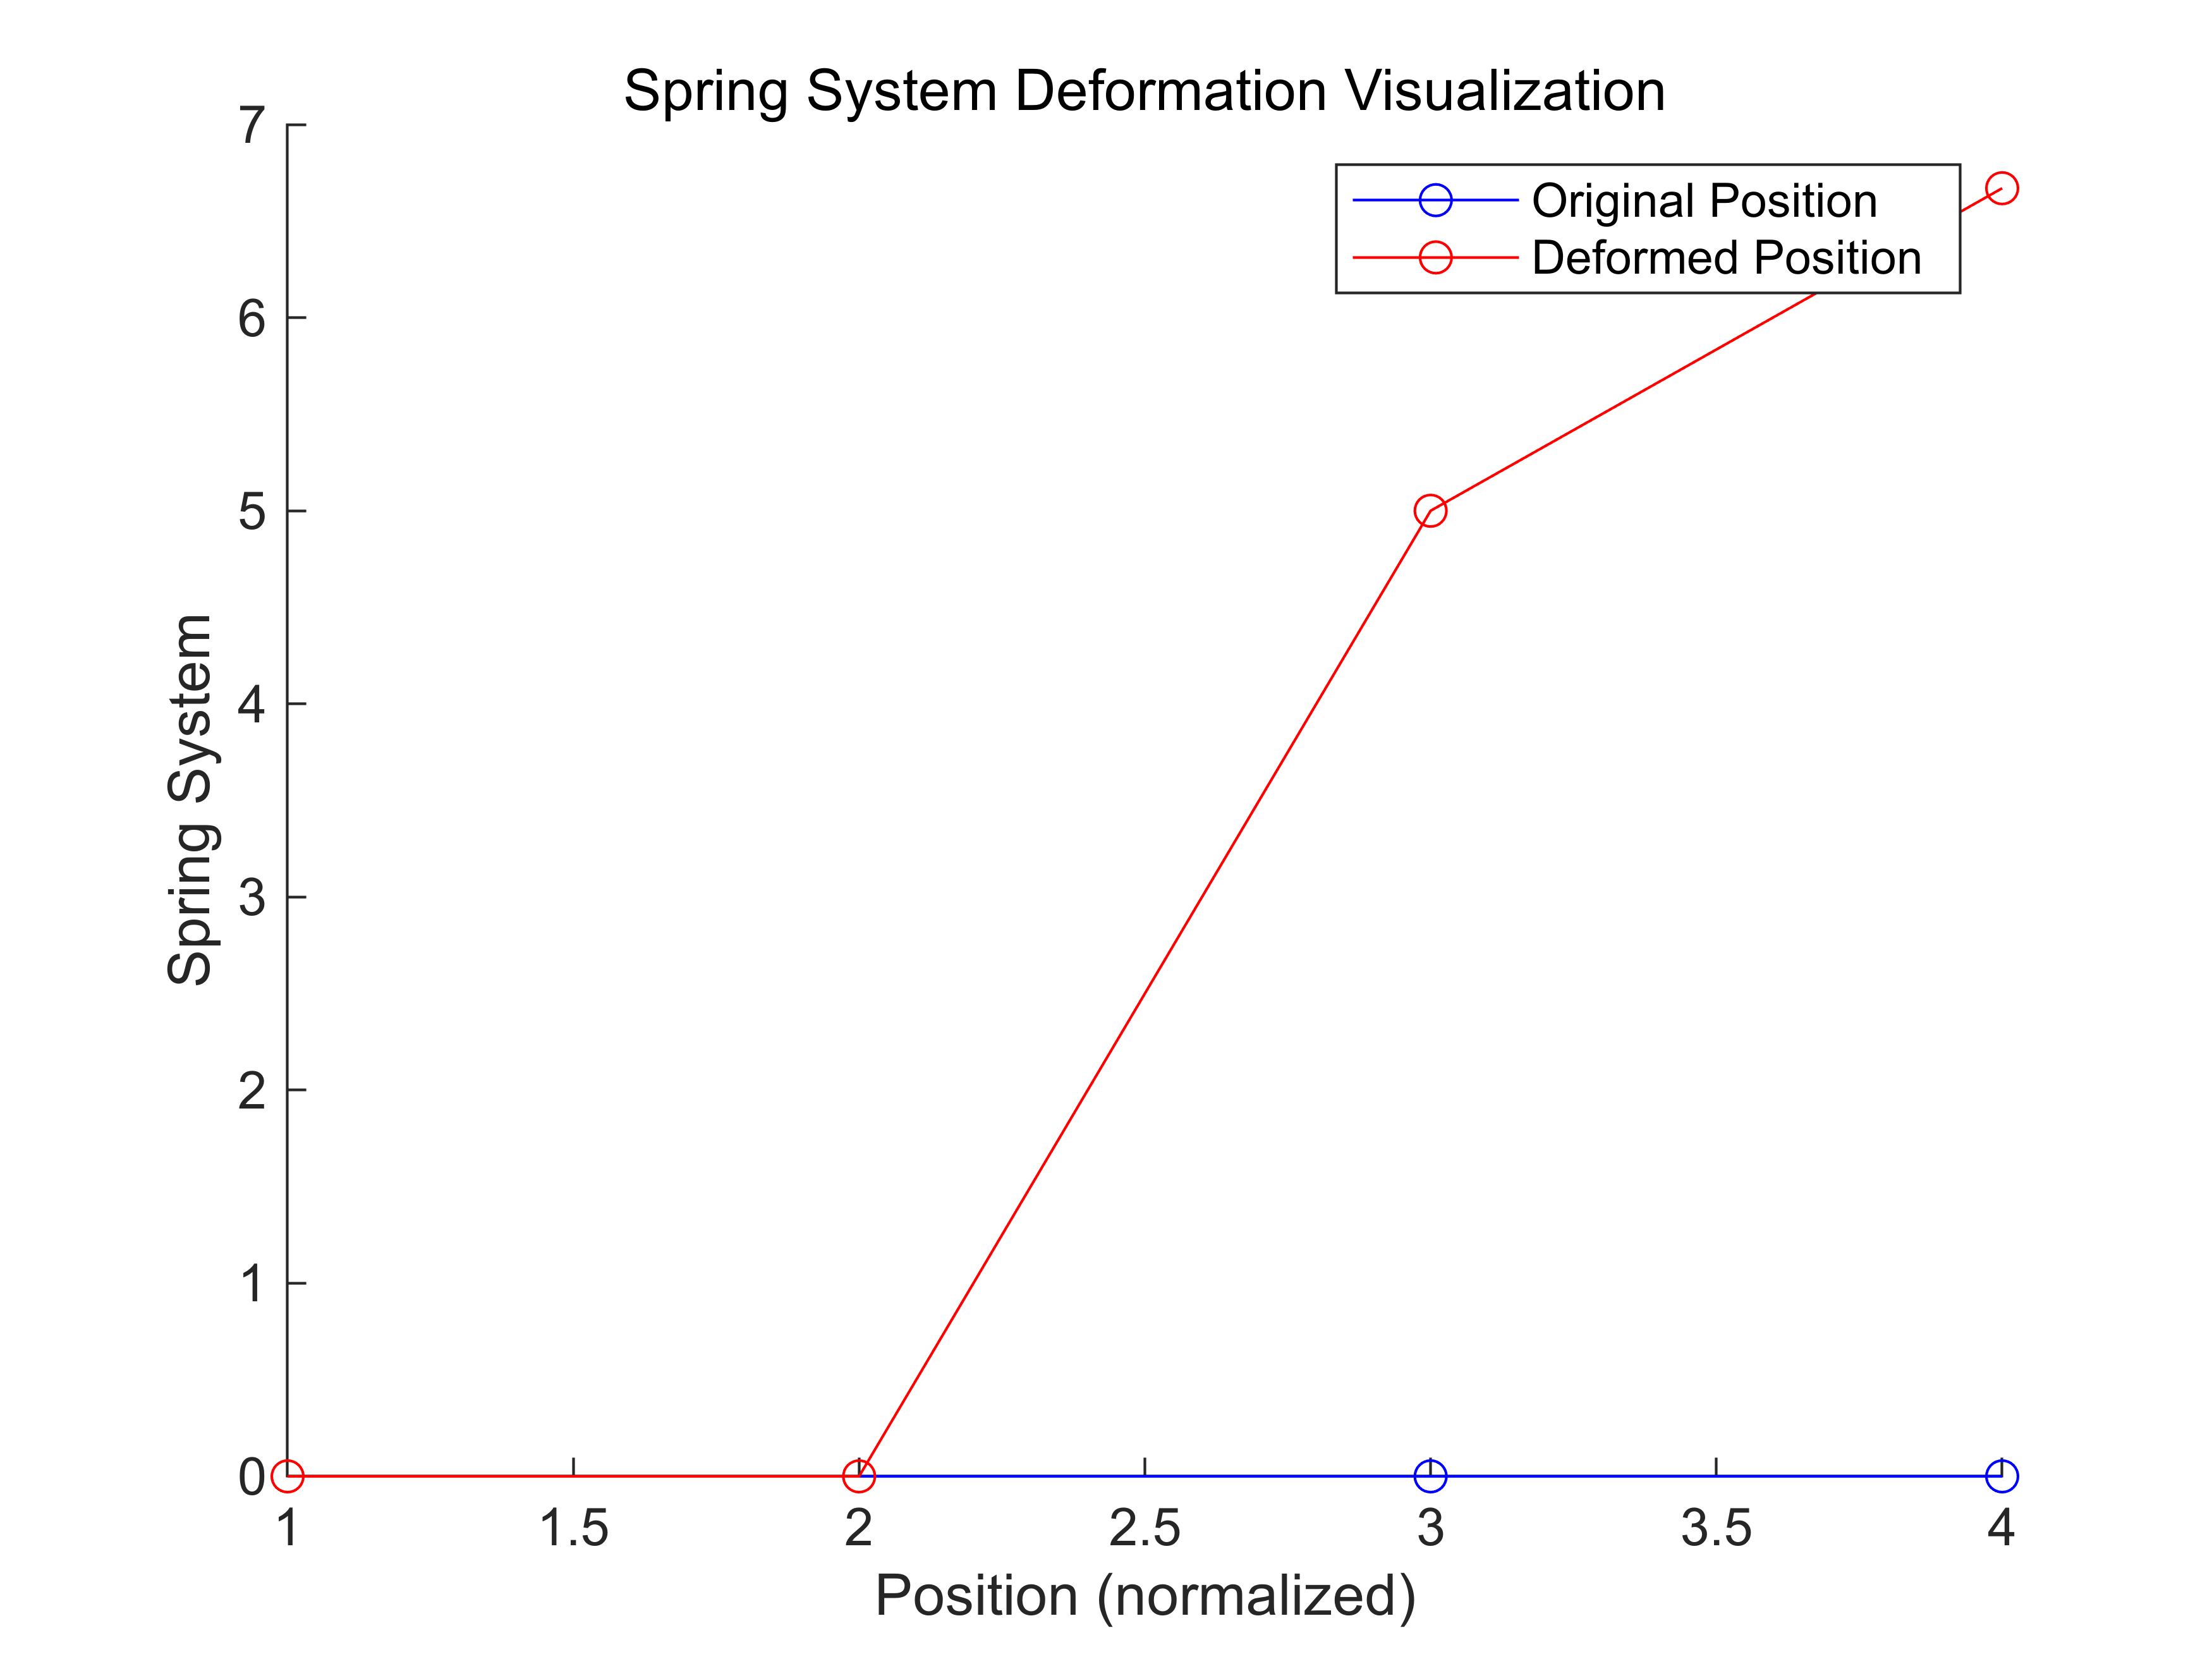

In [9]:
original_positions = [0 0 0 0]; % 원래의 노드 위치
deformed_positions = [0 0 5 6.67]; % 변형된 노드 위치
figure;
hold on;
plot(1:4, original_positions, 'bo-', 'DisplayName', 'Original Position');
plot(1:4, deformed_positions, 'ro-', 'DisplayName', 'Deformed Position');
xlabel('Position (normalized)');
ylabel('Spring System');
title('Spring System Deformation Visualization');
legend;
hold off;